# I. Introduction

## Background
Understanding our customer is a must in the crowded competition recent days. Maintaining and improving our customer could lengthen their lifetime period with higher quality transactions. This project focuses on the segmentation of credit card holders based on their behavioral patterns and distinct characteristics.

## Objective
The objective of this clustering is to identify the most effective, personalized strategies for increasing credit card usage frequency across different consumer segments.

## Dataset Background
The analysis utilizes an internal corporate dataset, which encompasses comprehensive consumer credit card transaction data collected over a six-month period.

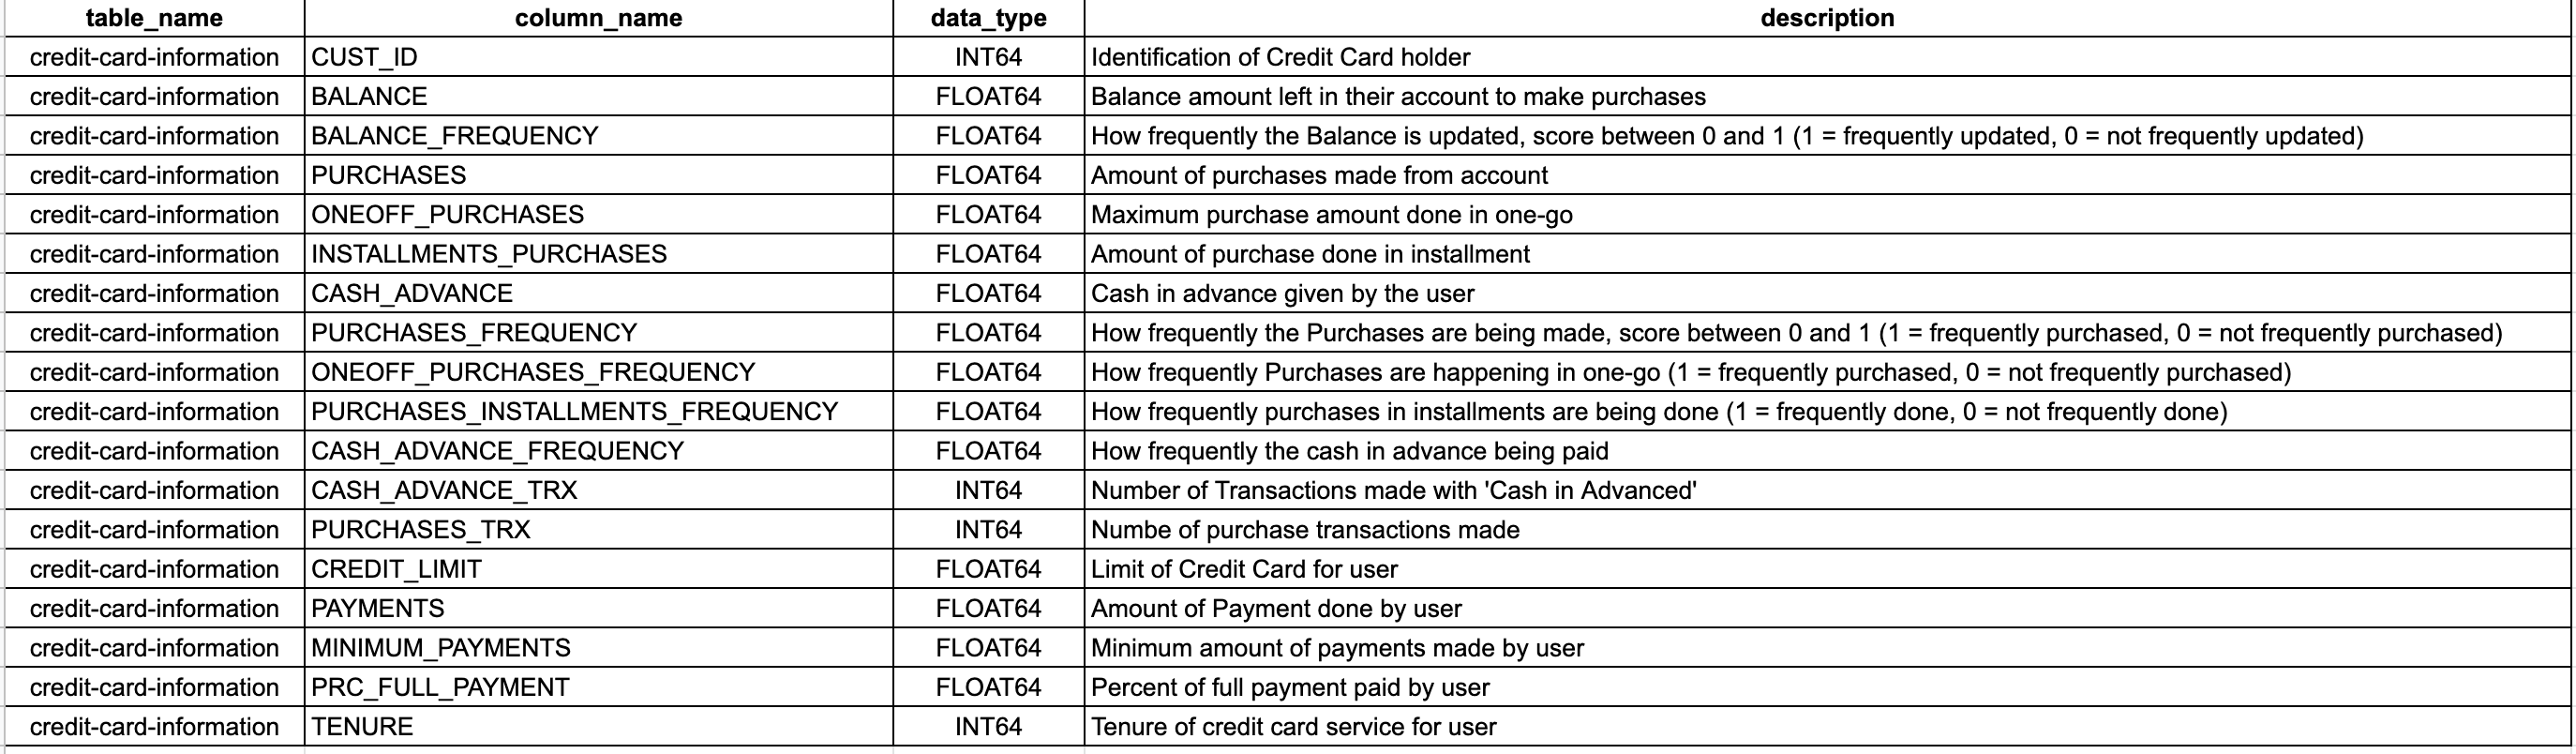

# II. Import Libraries

In [147]:
import pandas as pd                                                             # For Preprocessing
import numpy as np                                                              # For Numerical Operation
import seaborn as sns                                                           # For Visualization
import matplotlib.pyplot as plt                                                 # For Visualization
from sklearn.preprocessing import MinMaxScaler                                  # For Scaling and Encoding
from sklearn.impute import KNNImputer                                           # For Imputating Missing Value
from sklearn.compose import ColumnTransformer                                   # For Pipelining
from sklearn.preprocessing import FunctionTransformer                           # For Pipelining
from sklearn.pipeline import make_pipeline                                      # For Pipelining
from feature_engine.outliers import Winsorizer                                  # For Capping (Handling Outliers)
from sklearn.cluster import KMeans                                              # For Clustering
from sklearn.decomposition import PCA                                           # For Dimensionality Reduction
import matplotlib.cm as cm                                                      # For Visualization
from sklearn.metrics import silhouette_score,silhouette_samples                 # For Determining Number of Cluster
import dill                                                                     # For Reading Model

# III. Data Loading

In [148]:
# Load Data
df=pd.read_csv('dataset.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     1987    21.881528           1.000000      89.04             89.04   
1     2973    36.567901           0.090909    1098.31           1098.31   
2     4903     8.570991           0.272727     149.55            149.55   
3     7431  1409.206763           1.000000     143.50            143.50   
4     7979   810.739995           1.000000      86.90             86.90   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.0           0.0             0.083333   
1                     0.0           0.0             0.083333   
2                     0.0           0.0             0.083333   
3                     0.0           0.0             0.083333   
4                     0.0           0.0             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.083333                               0.0   
1                    0.083333                               0.0   
2                    0.083333                               0.0   
3                    0.083333                               0.0   
4                    0.083333                               0.0   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1        2500.0   
1                     0.0                 0              1        4800.0   
2                     0.0                 0              1        5000.0   
3                     0.0                 0              1        3000.0   
4                     0.0                 0              1        7500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  193.985335         96.885791               0.0      12  
1    0.000000               NaN               0.0      12  
2  447.377119         97.176376               0.0      12  
3  432.361276        300.764907               0.0      12  
4  253.775702        210.961925               0.0      12

In [149]:
# Check data's summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

From the information above, data type's features is correct

In [150]:
# Check duplicate row
df.duplicated().sum()

0

In [151]:
# Check standard missing values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [152]:
# Check data aggregation
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

From the information above, we can see that:
1. There is no negative value
2. BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, PRC_FULL_PAYMENT columns are filled by ratio number (0-1) so we use  but on CASH_ADVANCE_FREQUENCY there is the max value up to 1.5 so that we need check it further.
3. TENURE's columns is indicated as discrete columns, so that we need further check


In [153]:
# Check "TENURE" discrete column or not
df['TENURE'].value_counts()

TENURE
12    3777
11     199
10     122
6      101
8       99
7       90
9       87
Name: count, dtype: int64

From the information above, this column is contained with discrete values. Therefore, we will scale it using MinMaxScaler since it has a relative distance and no likelihood to have normal distribution. If there is any likelihood having normal distribution, it should use StandardScaler.

In [154]:
# Check potential extreme outlier
df.sort_values(by='CASH_ADVANCE_FREQUENCY').tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3429     6539  2648.244646                1.0       0.00              0.00   
982      7677  6956.376540                1.0   11500.94           3091.01   
4370     5199  9601.071318                1.0     238.34              0.00   
2976     4857  3688.371995                1.0       0.00              0.00   
1969     2389  1917.895730                1.0     285.07            285.07   
717      4375  7801.511533                1.0     231.40            231.40   
983      5727  5906.184924                1.0     141.80            141.80   
2334     8127  3857.562230                1.0       0.00              0.00   
631      5195  5656.069801                1.0     362.36            362.36   
2445     6407  3846.742530                1.0       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3429                    0.00  10458.978150             0.000000   
982                  8409.93  15133.532130             1.000000   
4370                  238.34   4809.119550             0.833333   
2976                    0.00  10746.545380             0.000000   
1969                    0.00   6084.858872             0.363636   
717                     0.00   4109.465221             0.100000   
983                     0.00   1651.286918             0.125000   
2334                    0.00   2127.213754             0.000000   
631                     0.00   7240.433194             0.250000   
2445                    0.00   1932.460679             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3429                    0.000000                          0.000000   
982                     1.000000                          1.000000   
4370                    0.000000                          0.833333   
2976                    0.000000                          0.000000   
1969                    0.363636                          0.000000   
717                     0.100000                          0.000000   
983                     0.125000                          0.000000   
2334                    0.000000                          0.000000   
631                     0.250000                          0.000000   
2445                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3429                1.000000               123              0        4000.0   
982                 1.000000                48            308       14000.0   
4370                1.000000                 8              5       15000.0   
2976                1.000000                63              0        7000.0   
1969                1.090909                28              6        3000.0   
717                 1.100000                20              3       13500.0   
983                 1.125000                12              2       10000.0   
2334                1.142857                26              0        5000.0   
631                 1.250000                12              2        8000.0   
2445                1.500000                18              0        5600.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3429   9818.531412        665.888853          0.000000      12  
982   20122.005450       1617.014574          0.166667      12  
4370   1194.510762       1206.257247          0.000000       6  
2976  10906.068460       1059.881395          0.083333      12  
1969   5692.682993        556.449635          0.000000      11  
717    1593.617739       1522.496755          0.000000      10  
983     933.969974        919.289675          0.000000       8  
2334    617.508991        538.396872          0.000000       7  
631     683.421497       2036.877611          0.000000       8  
2445    496.245836        538.346874          0.000000       6

From the information above, there are a few data valued more than 1. Those should be dropped.

In [155]:
# Drop extreme values
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]

# IV. Exploratory Data Analysis

In [156]:
# Display column's names
df.columns.to_list()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [157]:
# Simple Normality Check for Continous Columns
df[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']].agg(['mean','median','skew']).T

mean       median       skew
BALANCE                 1558.818441   869.947607   2.338836
PURCHASES               1004.369910   360.300000   7.067826
ONEOFF_PURCHASES         596.942188    45.450000   9.944849
INSTALLMENTS_PURCHASES   407.656793    89.370000   6.327382
CASH_ADVANCE             980.430871     0.000000   5.664124
CASH_ADVANCE_TRX           3.279705     0.000000   6.478210
PURCHASES_TRX             14.946297     7.000000   4.744940
CREDIT_LIMIT            4490.821631  3000.000000   1.501772
PAYMENTS                1740.170084   877.494612   5.747863
MINIMUM_PAYMENTS         873.775552   313.010299  14.661609

This skewness information will be the consideration on handling missing values and scaling

#### 1. Apakah terdapat pola antara pengaruh TENURE dengan variabel PURCHASES, BALANCE, dan PAYMENTS ?

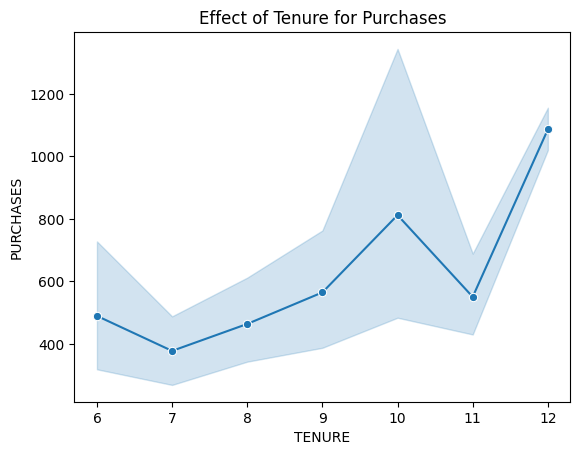

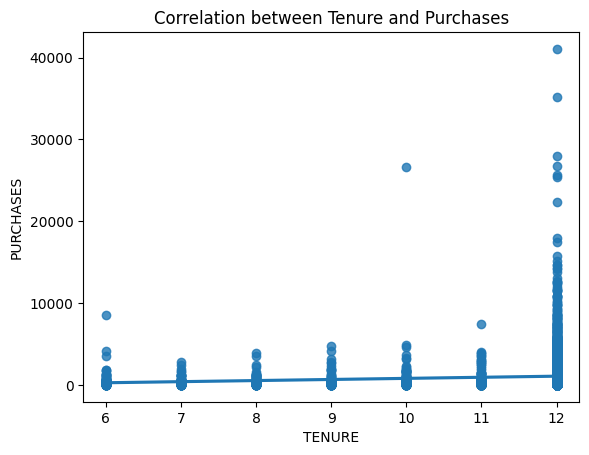

Correlation : 0.12488496631391127


In [158]:
# Effect of 'TENURE' for 'PURCHASES'
sns.lineplot(data=df,x='TENURE',y='PURCHASES', marker='o')
plt.title("Effect of Tenure for Purchases")
plt.show()

corr=df['TENURE'].corr(df['PURCHASES'], method='spearman')
sns.regplot(data=df,x='TENURE',y='PURCHASES')
plt.title("Correlation between Tenure and Purchases")
plt.show()
print(f'Correlation : {corr}')

From the information above, the correlation between TENURE and PURCHASES is too low. So we cannot apply different or special treatment for longest-registered customer, though the correlation is positive.

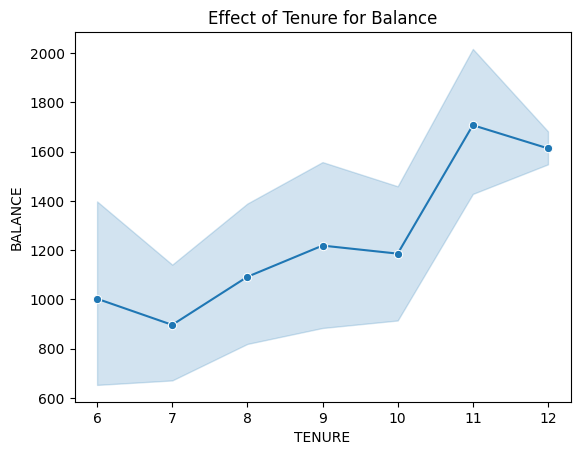

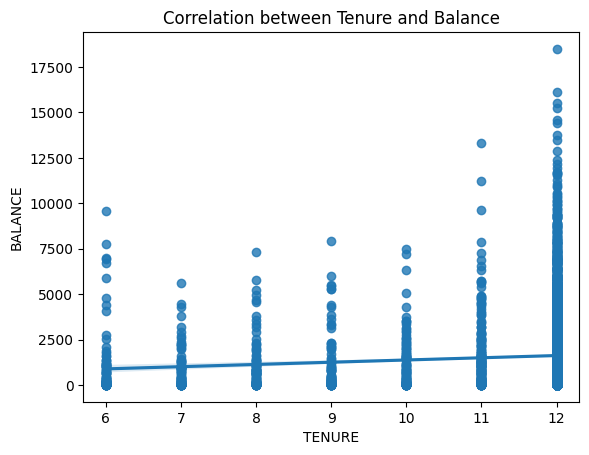

Correlation : 0.06650259579487969


In [159]:
# Effect of 'TENURE' for 'BALANCE'
sns.lineplot(data=df,x='TENURE',y='BALANCE', marker='o')
plt.title("Effect of Tenure for Balance")
plt.show()

# Correlation analysis
corr=df['TENURE'].corr(df['BALANCE'], method='spearman')
sns.regplot(data=df,x='TENURE',y='BALANCE')
plt.title("Correlation between Tenure and Balance")
plt.show()
print(f'Correlation : {corr}')

From the information above, the correlation between TENURE and BALANCE is too low. So we cannot apply different or special treatment for longest-registered customer, though the correlation is positive.

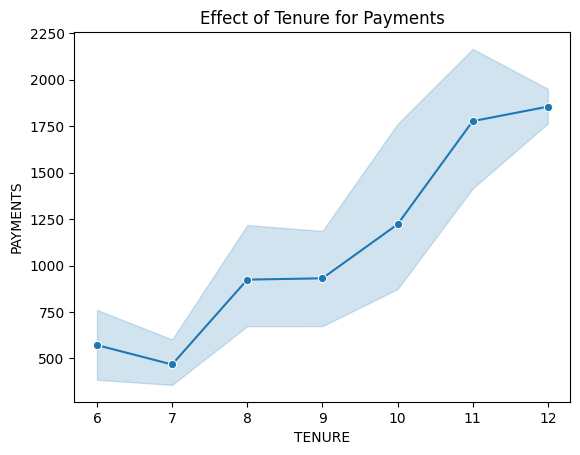

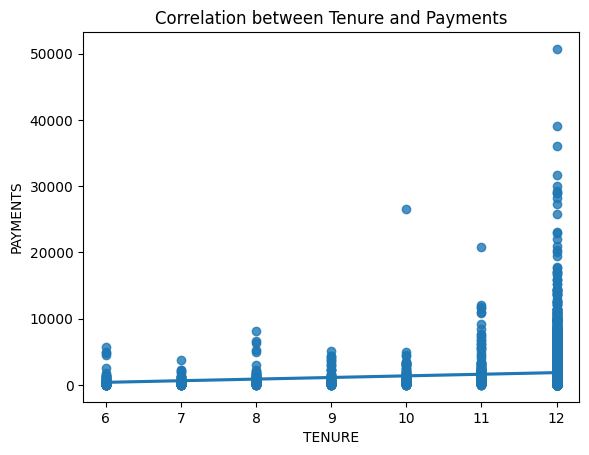

Correlation : 0.19970585969475935


In [160]:
# Effect of 'TENURE' for 'PAYMENTS'
sns.lineplot(data=df,x='TENURE',y='PAYMENTS', marker='o')
plt.title("Effect of Tenure for Payments")
plt.show()

# Correlation analysis
corr=df['TENURE'].corr(df['PAYMENTS'], method='spearman')
sns.regplot(data=df,x='TENURE',y='PAYMENTS')
plt.title("Correlation between Tenure and Payments")
plt.show()
print(f'Correlation : {corr}')

From the information above, the correlation between TENURE and PAYMENTS is too low. So we cannot apply different or special treatment for longest-registered customer, though the correlation is positive.


Regardless of low correlation between TENURE with PURCHASES, BALANCE, PAYMENTS, we can see customer with tenure 12 have highest PURCHASES, BALANCE, PAYMENTS. Therefore, we can do something interesting for customer with tenure 12 because their generate much money then other customers.

#### 2. Apakah nasabah dengan CREDIT_LIMIT yang tinggi cenderung lebih sering melakukan pembelian ?

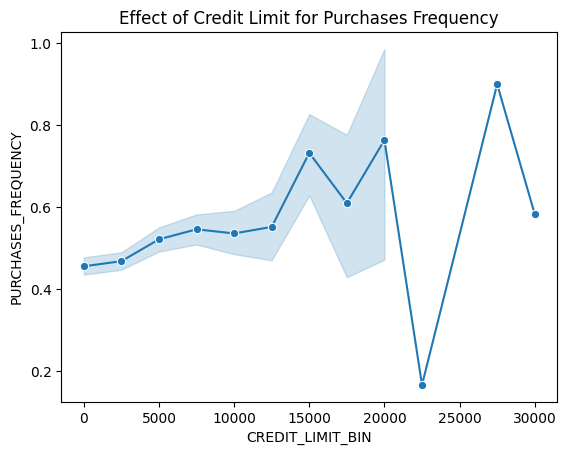

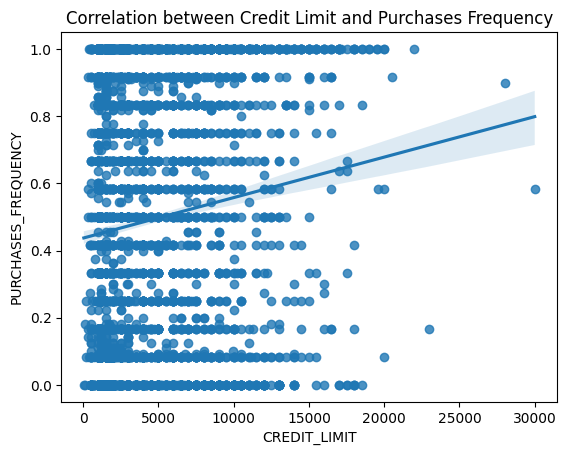

Correlation : 0.08605540312096882


In [161]:
# Effect of 'CREDIT_LIMIT' for 'PURCHASES_FREQUENCY'
df['CREDIT_LIMIT_BIN'] = (df['CREDIT_LIMIT'] // 2500) * 2500
sns.lineplot(data=df, x='CREDIT_LIMIT_BIN', y='PURCHASES_FREQUENCY', marker='o')
plt.title('Effect of Credit Limit for Purchases Frequency')
plt.show()

# Correlation analysis
corr=df['CREDIT_LIMIT'].corr(df['PURCHASES_FREQUENCY'], method='spearman')
sns.regplot(data=df,x='CREDIT_LIMIT',y='PURCHASES_FREQUENCY')
plt.title("Correlation between Credit Limit and Purchases Frequency")
plt.show()
print(f'Correlation : {corr}')

# Drop helper column
df=df.drop(['CREDIT_LIMIT_BIN'], axis=1)

From the information above, the correlation between Credit Limit and Purchases Frequency is too low. So we cannot get valuable insight, though the correlation is positive.

For marketing recommendation, we cannot consider their credit limit for our basis of special marketing approaches.

# V. Feature Engineering

### Data Preprocessing

In [162]:
# Check symptom of NaN values in MINIMUM_PAYMENTS is correlated with PAYMENTS
df.sort_values(by='PAYMENTS',ascending=False).tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2499     2815   116.654149           0.272727     907.00            907.00   
2509     5999    25.998899           0.111111       0.00              0.00   
911      5951     0.000000           0.000000     240.10              0.00   
2530     6821  4223.832142           1.000000       0.00              0.00   
2539     2941     9.128510           0.181818      80.06             80.06   
942      8361   141.656741           0.181818    1109.83           1109.83   
939       523  2676.253141           0.909091       0.00              0.00   
2546      917     8.285344           0.142857      72.52             72.52   
3660      125    71.310815           0.090909       0.00              0.00   
1787     6207   147.418569           0.181818    1074.00           1074.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2499                     0.0    273.558033             0.250000   
2509                     0.0    466.387778             0.000000   
911                    240.1      0.000000             0.583333   
2530                     0.0   3305.855177             0.000000   
2539                     0.0      0.000000             0.083333   
942                      0.0    379.155222             0.166667   
939                      0.0   2832.570661             0.000000   
2546                     0.0      0.000000             0.142857   
3660                     0.0   1849.578078             0.000000   
1787                     0.0      0.000000             0.083333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2499                    0.250000                          0.000000   
2509                    0.000000                          0.000000   
911                     0.000000                          0.583333   
2530                    0.000000                          0.000000   
2539                    0.083333                          0.000000   
942                     0.166667                          0.000000   
939                     0.000000                          0.000000   
2546                    0.142857                          0.000000   
3660                    0.000000                          0.000000   
1787                    0.083333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2499                0.083333                 1              8        5000.0   
2509                0.111111                 1              0        4000.0   
911                 0.000000                 0              7        2500.0   
2530                0.500000                18              0        4500.0   
2539                0.000000                 0              1        1600.0   
942                 0.083333                 1              3        1200.0   
939                 0.083333                 2              0        3000.0   
2546                0.000000                 0              1        3000.0   
3660                0.083333                 1              0        6000.0   
1787                0.000000                 0              2        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2499       0.0               NaN               0.0      12  
2509       0.0               NaN               0.0       9  
911        0.0               NaN               0.0      12  
2530       0.0               NaN               0.0      12  
2539       0.0               NaN               0.0      12  
942        0.0               NaN               0.0      12  
939        0.0               NaN               0.0      12  
2546       0.0               NaN               0.0       7  
3660       0.0               NaN               0.0      12  
1787       0.0               NaN               0.0      12

In [163]:
# Check symptom more detail
df[~((df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna()))].sort_values(by='PAYMENTS').tail()

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2466     8049   2980.054695           0.818182   26784.62          26514.32   
1778      533   4419.302940           1.000000   12551.95          10901.24   
916      7855  13479.288210           1.000000   41050.40          40624.06   
2906     5377  10905.053810           1.000000     431.93            133.50   
1344     5757   1268.809031           0.272727   17945.00          17945.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2466                  270.30       0.00000             0.583333   
1778                 1650.71   14896.54051             1.000000   
916                   426.34       0.00000             0.833333   
2906                  298.43   47137.21176             0.583333   
1344                    0.00       0.00000             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2466                    0.500000                          0.083333   
1778                    0.666667                          1.000000   
916                     0.666667                          0.416667   
2906                    0.250000                          0.500000   
1344                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2466                     0.0                 0             33       30000.0   
1778                     0.5                19            122       17000.0   
916                      0.0                 0            157       17000.0   
2906                     1.0               123             21       19600.0   
1344                     0.0                 0              3       18000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2466  30029.01496      11853.796130          0.750000      12  
1778  31698.41902       1448.585054          0.416667      12  
916   36066.75068      15914.484620          0.083333      12  
2906  39048.59762       5394.173671          0.000000      12  
1344  50721.48336       1149.747342          0.000000      12

From the information above, there is correlation of NaN values in MINIMUM_PAYMENTS with PAYMENTS. So we will drop those columns. For NaN values in MINIMUM_PAYMENTS but have values on PAYMENTS, we will impute with KNN algorithm

In [164]:
# Drop row with PAYMENTS is 0 and MINIMUM_PAYMENTS is NaN
df = df[~((df['PAYMENTS'] == 0) & (df['MINIMUM_PAYMENTS'].isna()))]

In [165]:
# Grouping columns based on characteristics
ratio_or_discrete_cols=['TENURE', 'BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
continous_cols = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

Grouping above based on what feature engineering we will do namely:
1. For ratio and discrete columns, we will do missing value handling (if exist) and scaling using MinMaxScaler. This scaler is choosen since the columns already range between 0-1 and for 'TENURE', it has relative distance between each datum.
2. For continous cols, because all columns are skew, we will do capping (IQR*3). Since on ratio or discrete columns we use MinMaxScaler, we would use Log Transformation before applying MinMaxScaler. This consideration emerges because we will use K-Means which uses Euclidean Distance so that using same scaler is crucial.

### Feature Transformation

In [166]:
# Function for dropping ID columns
def drop (df):
    return df.drop(columns=['CUST_ID'], axis=1)
drop_column=FunctionTransformer(drop)                              

imputer = KNNImputer(n_neighbors=5)

# Feature engineering for ratio_or_discrete_cols
non_capping_pipe = make_pipeline(imputer.set_output(transform="pandas"),
                                 MinMaxScaler())      

# Feature engineering for continous_cols
capping_pipe = make_pipeline(Winsorizer(capping_method='iqr',                       
                                        tail='both',
                                        fold=3,
                                        missing_values='ignore'),
                            imputer.set_output(transform="pandas"),
                            FunctionTransformer(np.log1p),
                            MinMaxScaler())    

# Pipeline for Feature engineering
preprocessing_pipeline = ColumnTransformer([
    ('pipe_non_capping', non_capping_pipe, ratio_or_discrete_cols),
    ('pipe_capping_cols', capping_pipe, continous_cols)
    ], remainder='passthrough')

### Dimensionality Reduction

Text(0, 0.5, 'Eigenvalues')

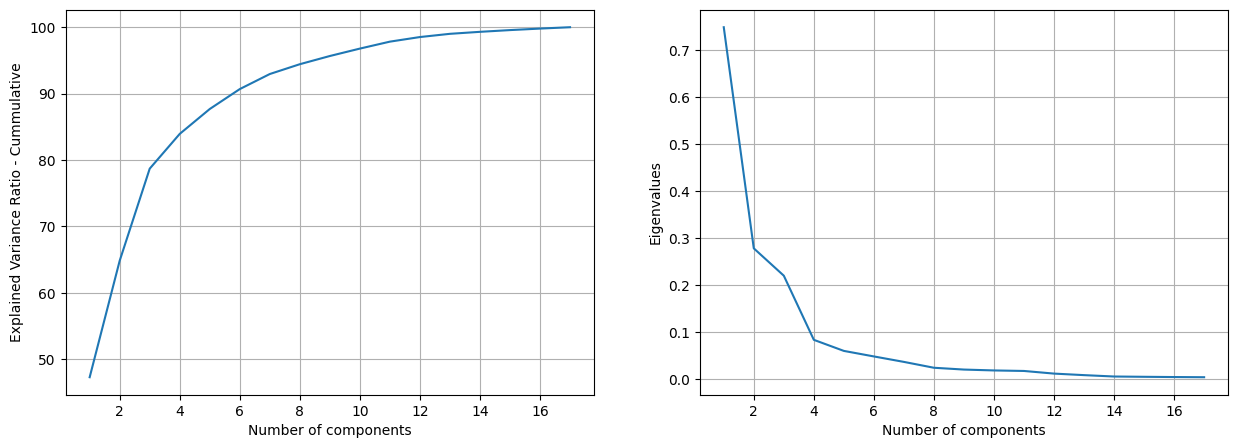

In [167]:
# Implement PCA
pca_check=PCA()
pipe_pca_check = make_pipeline(drop_column, preprocessing_pipeline, pca_check)
pca_check_result = pipe_pca_check.fit(df)
fitted_pca = pca_check_result[-1]

# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(fitted_pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), fitted_pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [168]:
# Determine PCA contained 95% information
pca_train = PCA(n_components=0.95)

We want to retain 95% data. From this consideration, we can see 95% variance ratio will contain with 9 components and they have eigenvalues less than 0.1

In [169]:
# Pipeline and Train for Determining Number of Cluster
cluster_num_check = make_pipeline(drop_column, preprocessing_pipeline, pca_train)
df_cluster_check = cluster_num_check.fit_transform(df)

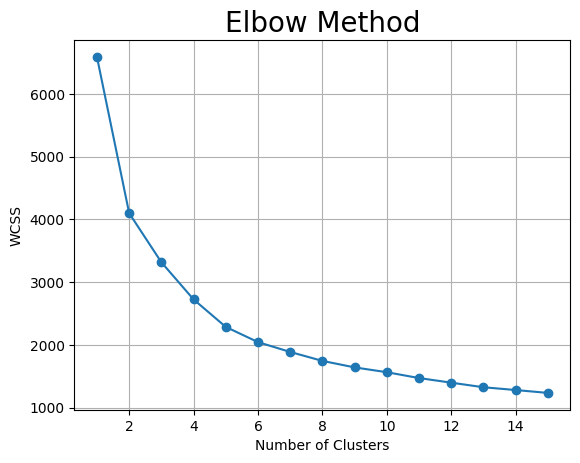

In [170]:
# Find the optimal number of clusters using Elbow Method

# Calculate WCSS
wcss = []
random_state = 10
max_cluster = 15
for i in range(1, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_cluster_check)
    wcss.append(km.inertia_)

# Visualization of Elbow Method
plt.plot(range(1, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the information above, there is elbow ranging from 2-6 clusters. For final decision, we should review the sillhoute score.

In [171]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3402676806697326
For n_clusters = 3 The average silhouette_score is : 0.2954074661748333
For n_clusters = 4 The average silhouette_score is : 0.32301323006683075
For n_clusters = 5 The average silhouette_score is : 0.3359779498023011
For n_clusters = 6 The average silhouette_score is : 0.3248221521704318
For n_clusters = 7 The average silhouette_score is : 0.3167029291086111
For n_clusters = 8 The average silhouette_score is : 0.3151645792033115
For n_clusters = 9 The average silhouette_score is : 0.3204381642620556
For n_clusters = 10 The average silhouette_score is : 0.3192238231980415
For n_clusters = 11 The average silhouette_score is : 0.31968878325814193
For n_clusters = 12 The average silhouette_score is : 0.26452358375625984
For n_clusters = 13 The average silhouette_score is : 0.26850097384301763
For n_clusters = 14 The average silhouette_score is : 0.2633269530071166


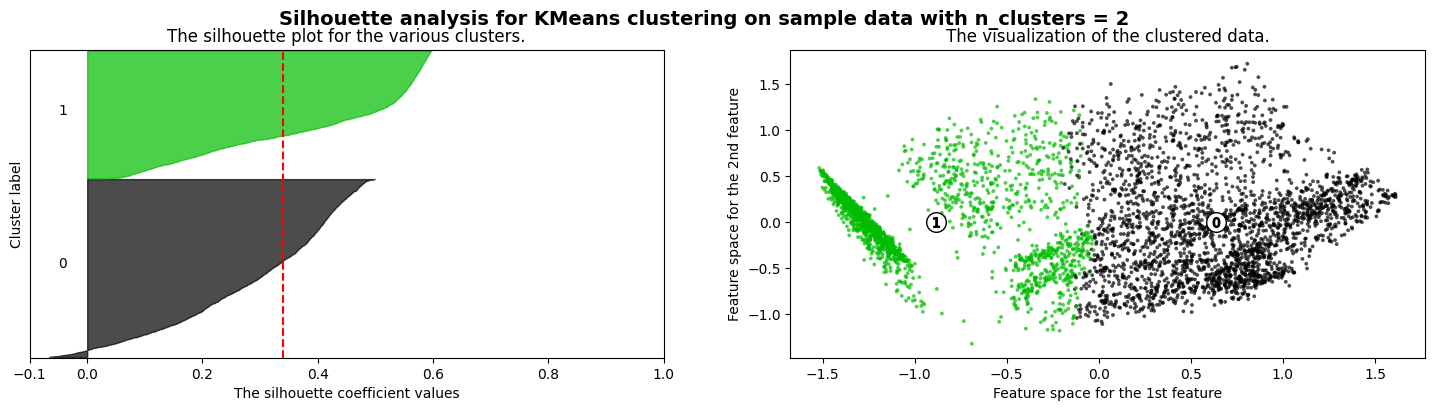

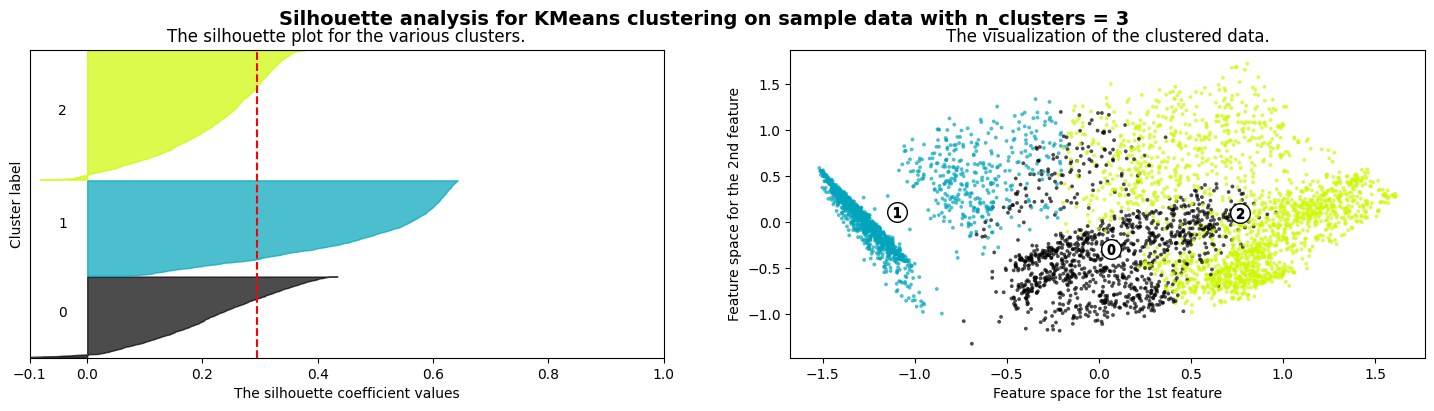

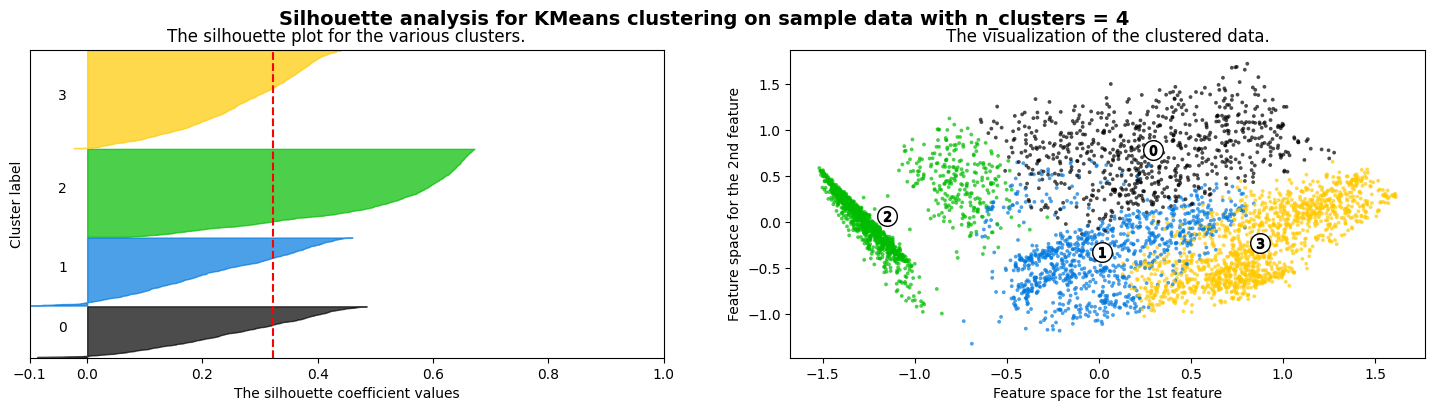

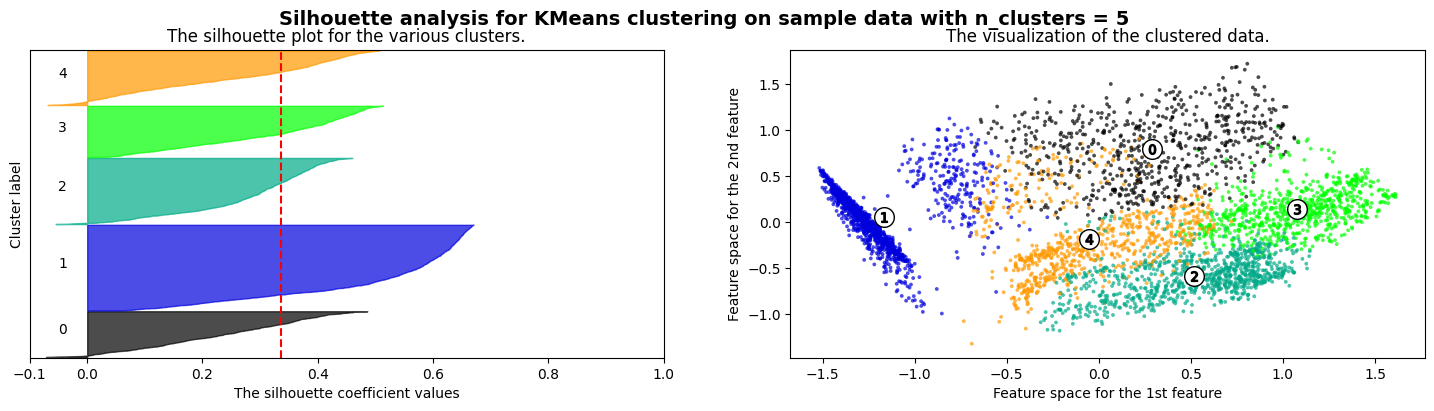

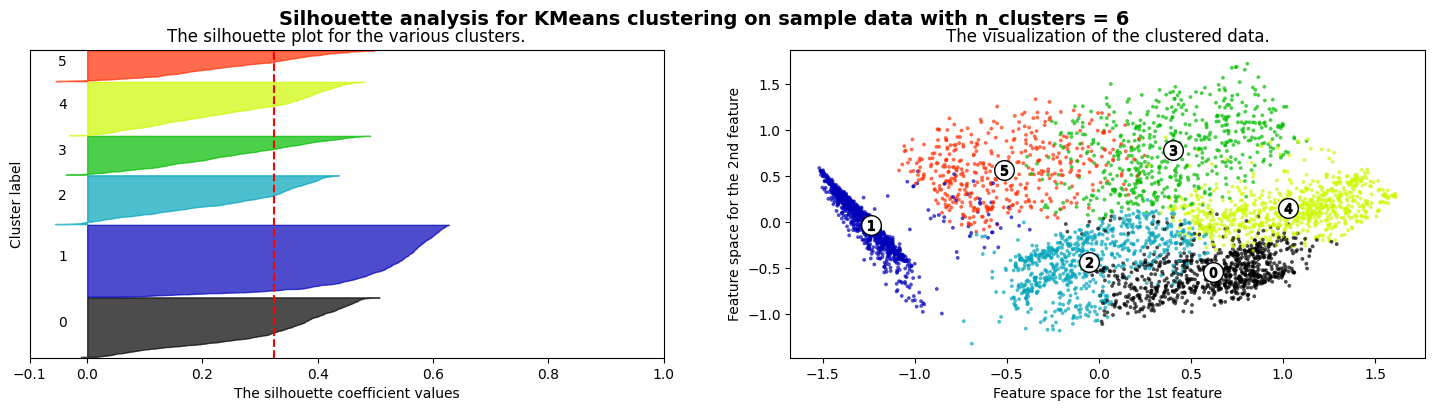

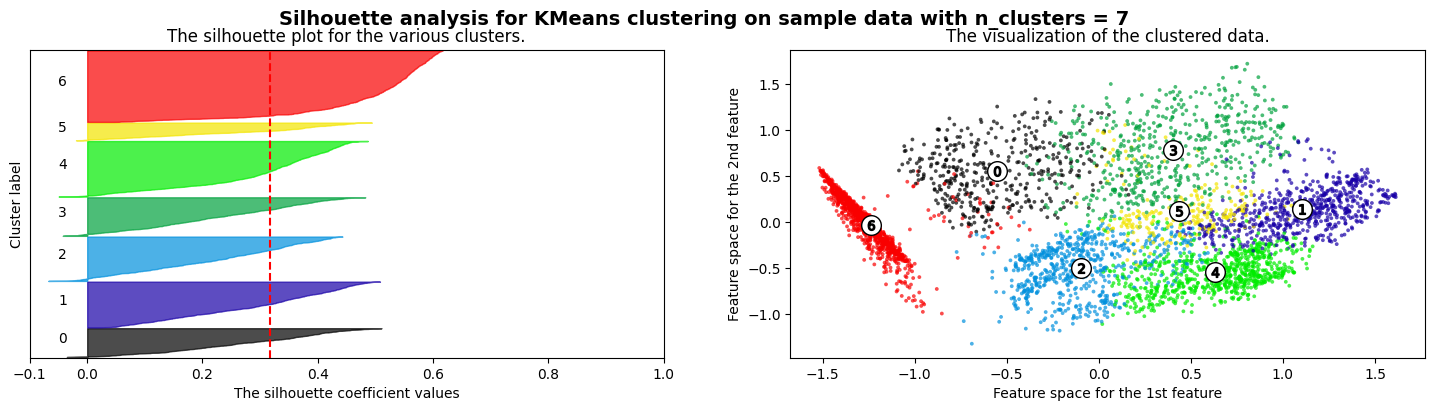

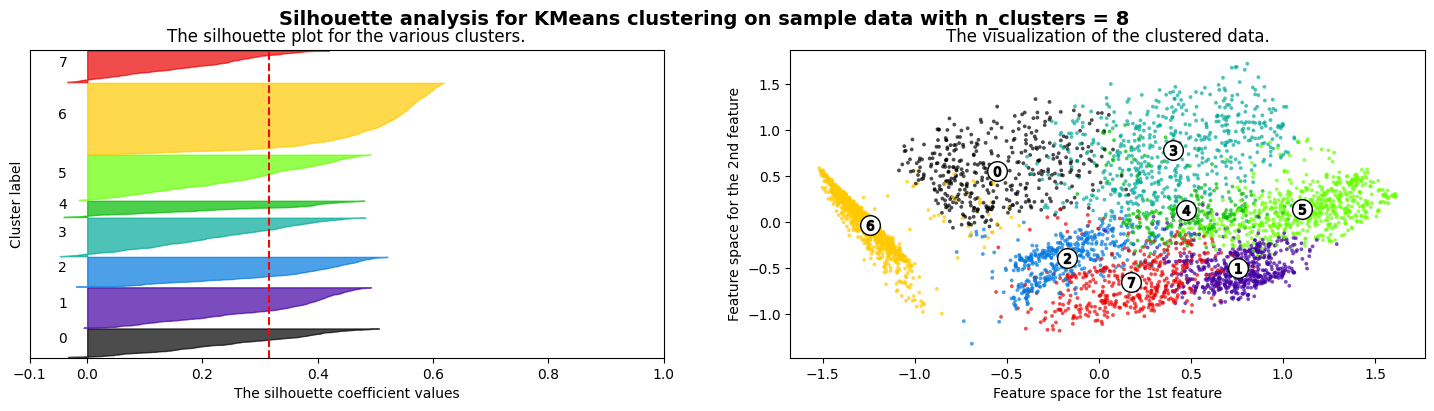

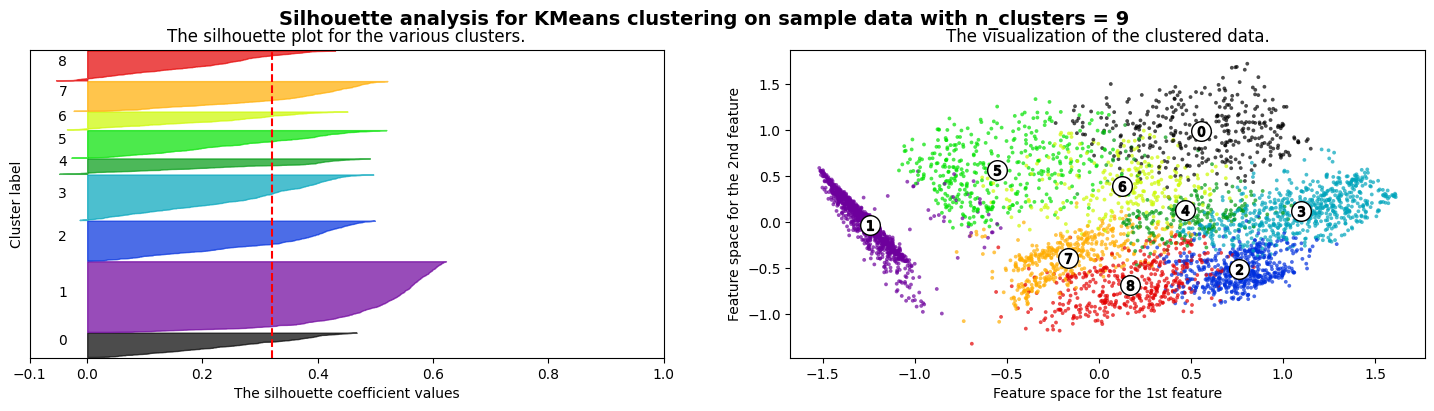

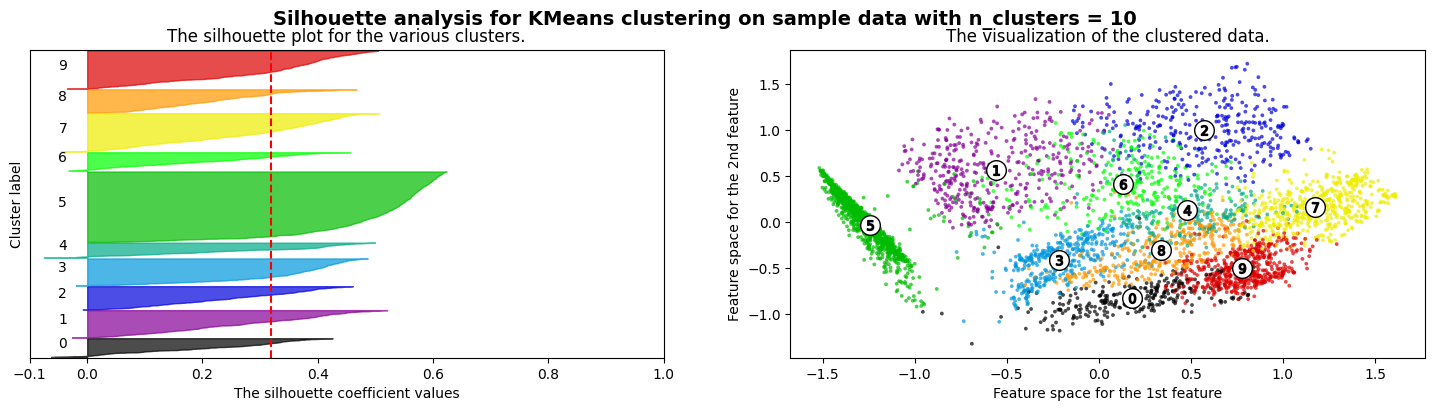

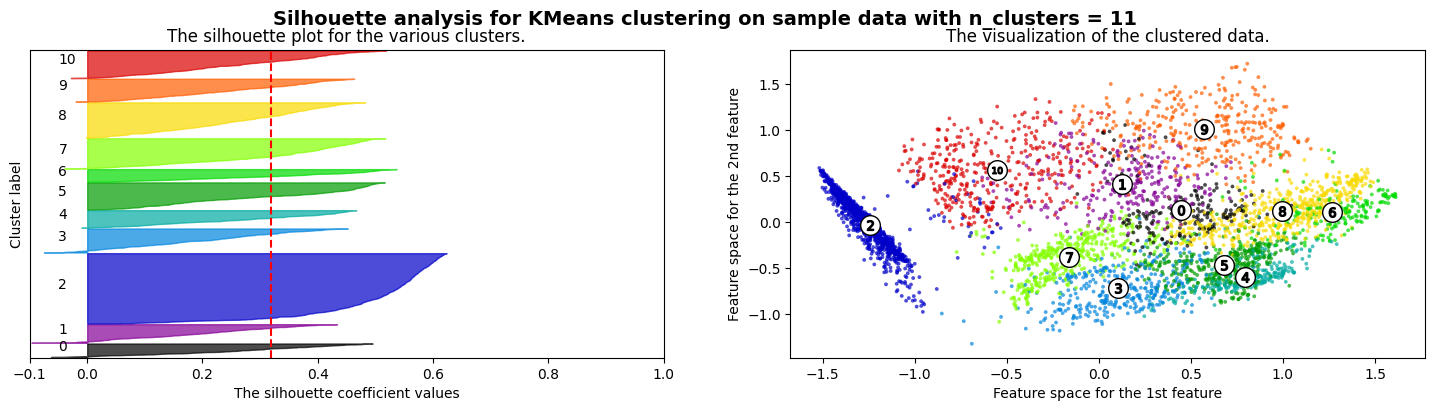

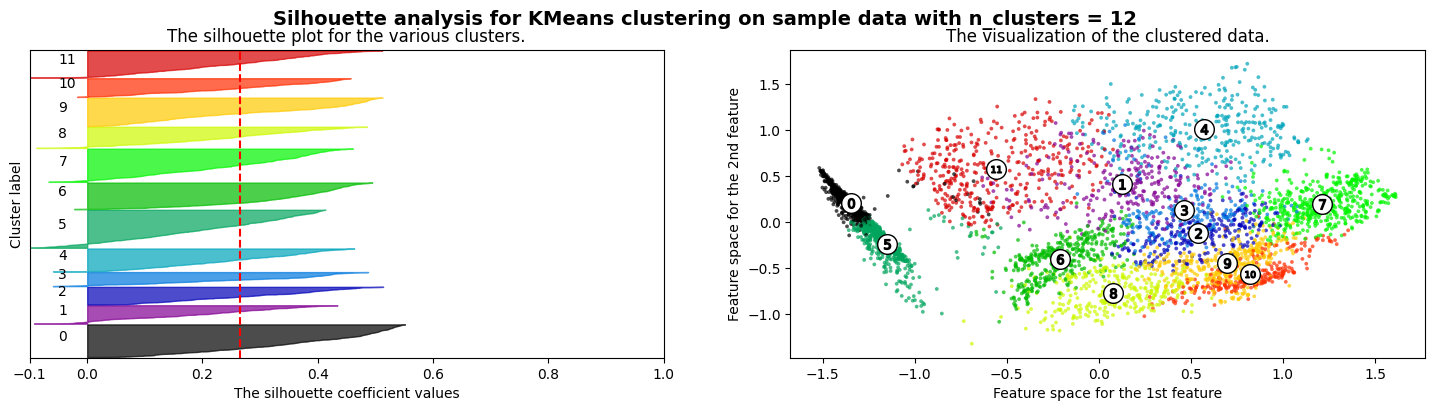

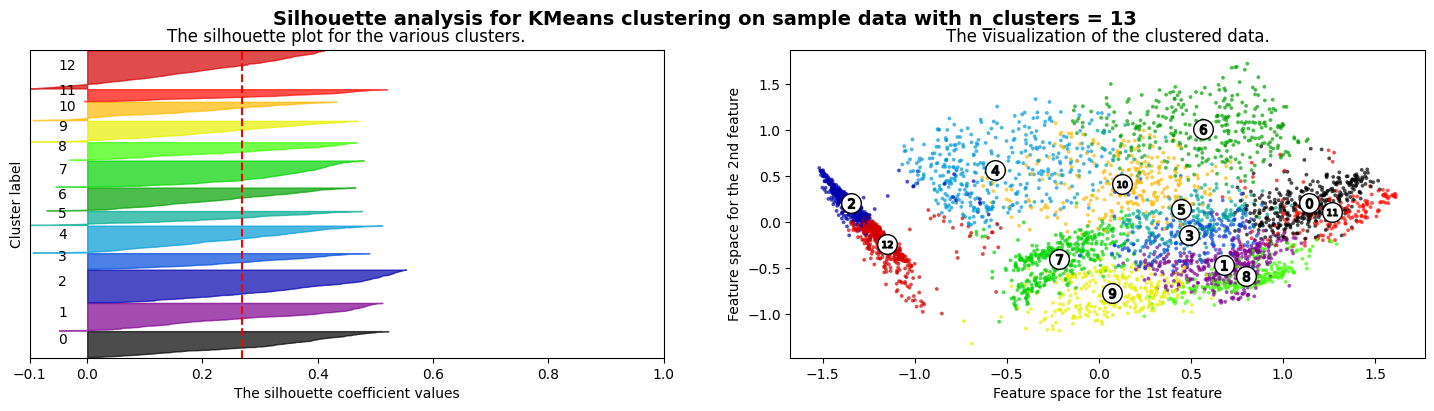

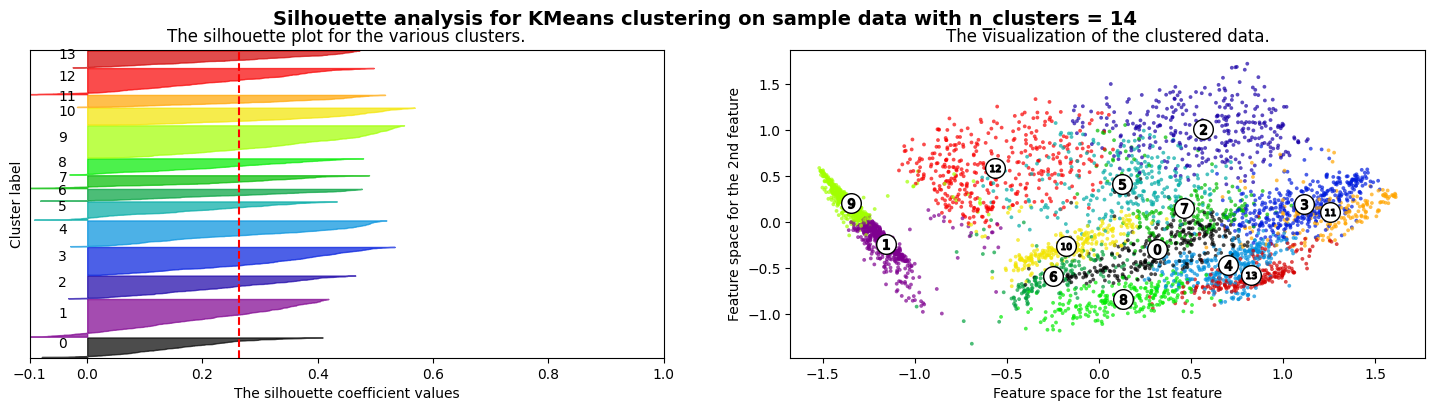

In [172]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_cluster_check, random_state)

From the information above, the highest score is for 2 clusters and 5 clusters. These align with the elbow method ranging from 2-6 clusters. For better segmentation, we choose 5 cluster for more personalized insight.

# VI. Model Definition

This project will cluster credit card's customer using K-Means algorithm. This algorithm will be used because we want to deem all data without ignoring them as noises. For detemining number of cluster, we have used Elbow Method and Sillhoute and detemined to use 5 clusters.

In [173]:
# Define Model
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 20)

# VII. Model Training

In [174]:
# Define Trained Model
km_train = make_pipeline(drop_column, preprocessing_pipeline, pca_train, km)

# Train Model
pred = km_train.fit_predict(df)
pred

array([3, 3, 3, ..., 0, 0, 3])

# VIII. Model Evaluation

In [175]:
# Prepare Dataset
df_result=df.copy()
df_result=pd.DataFrame(imputer.fit_transform(df_result))

# Input Result into Dataset
df_result['CLUSTER'] = pred
df_result.to_csv('deployment/final_dataset.csv')
df_result.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    1987.0    21.881528           1.000000      89.04             89.04   
2    4903.0     8.570991           0.272727     149.55            149.55   
3    7431.0  1409.206763           1.000000     143.50            143.50   
4    7979.0   810.739995           1.000000      86.90             86.90   
5    2279.0   558.476701           1.000000     630.03            630.03   
6    4049.0  1714.896284           1.000000    2000.00           2000.00   
7     133.0   271.051660           0.909091      86.00              0.00   
8    2185.0    98.364739           0.181818      65.00              0.00   
9    2891.0   907.371097           1.000000      55.65              0.00   
10    703.0    44.539341           0.363636      94.30             71.80   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     0.00           0.0             0.083333   
2                     0.00           0.0             0.083333   
3                     0.00           0.0             0.083333   
4                     0.00           0.0             0.083333   
5                     0.00           0.0             0.090909   
6                     0.00           0.0             0.111111   
7                    86.00           0.0             0.166667   
8                    65.00           0.0             0.166667   
9                    55.65           0.0             0.166667   
10                   22.50           0.0             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.083333                          0.000000   
2                     0.083333                          0.000000   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
5                     0.090909                          0.000000   
6                     0.111111                          0.000000   
7                     0.000000                          0.166667   
8                     0.000000                          0.166667   
9                     0.000000                          0.166667   
10                    0.083333                          0.250000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                      0.0               0.0            1.0        2500.0   
2                      0.0               0.0            1.0        5000.0   
3                      0.0               0.0            1.0        3000.0   
4                      0.0               0.0            1.0        7500.0   
5                      0.0               0.0            1.0        5500.0   
6                      0.0               0.0            1.0        2000.0   
7                      0.0               0.0            2.0        1000.0   
8                      0.0               0.0            2.0        1200.0   
9                      0.0               0.0            3.0        1000.0   
10                     0.0               0.0            4.0        2500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0   193.985335         96.885791               0.0    12.0        3  
2   447.377119         97.176376               0.0    12.0        3  
3   432.361276        300.764907               0.0    12.0        3  
4   253.775702        210.961925               0.0    12.0        3  
5   426.092563        213.369694               0.0    11.0        3  
6   448.300443        348.836471               0.0     9.0        3  
7   442.141178       2863.640612               0.0    12.0        4  
8   718.794328         53.655347               0.0    12.0        4  
9   416.818116        603.735158               0.0    12.0        4  
10  940.026302        147.851745               0.0    12.0        3

In [176]:
# For deployment EDA
featured_data = pd.DataFrame(df_cluster_check)
featured_data.to_csv('deployment/featured_data.csv')

<Axes: >

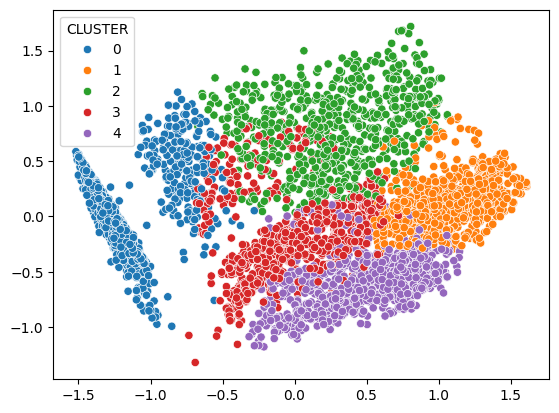

In [177]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(df_cluster_check)

sales_scaled_pca_2d = pca_2d.fit_transform(df_cluster_check)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df_result['CLUSTER'], palette='tab10')

In [178]:
# Define columns' list without CLUSTER and CUST_ID
cols = df_result.drop(columns=['CLUSTER','CUST_ID']).columns.tolist()

# Determine mean as default aggregation function
agg_dict = {col: 'mean' for col in cols}

# Adjust for TENURE using median because it is discrete column
if 'TENURE' in agg_dict:
    agg_dict['TENURE'] = 'median'

# Make table for aggregation value
profil_cluster = df_result.groupby('CLUSTER').agg(agg_dict)
profil_cluster

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
CLUSTER                                                                  
0        2286.650461           0.907521    38.714516         35.554589   
1        1353.045416           0.971742  3039.695875       1951.091655   
2        3083.981362           0.973839  1583.037565        854.696119   
3         899.457707           0.803173   779.047905        750.959259   
4         374.549559           0.805943   536.295353          8.351960   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CLUSTER                                                              
0                      3.204451   2104.910203             0.026421   
1                   1088.604220     14.319200             0.909642   
2                    728.341446   2439.791488             0.778975   
3                     28.088646    119.846989             0.339123   
4                    528.964468     10.325013             0.721389   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CLUSTER                                                                 
0                          0.020324                          0.005639   
1                          0.556772                          0.712705   
2                          0.317668                          0.611915   
3                          0.307317                          0.035369   
4                          0.008013                          0.681305   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CLUSTER                                                            
0                      0.286490          6.854353       0.393816   
1                      0.005136          0.061058      41.879240   
2                      0.323642          8.592085      28.076104   
3                      0.027302          0.394636       6.638570   
4                      0.003776          0.047418      11.792413   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CLUSTER                                                                         
0         4227.641344  1711.896713       1046.343003          0.039486    12.0  
1         6042.062415  2827.166369        673.747420          0.298371    12.0  
2         5642.389650  2871.327564       1487.696799          0.046145    12.0  
3         4192.567824  1233.502309        468.649340          0.102836    12.0  
4         3128.904163   776.588948        685.421166          0.308731    12.0

From analyzing all feature, for simplifying analysis, we would take more attention for these features:
 - BALANCE
 - PRC FULL PAYMENT
 - ONEOFF vs INSTALLMENT vs CASH ADVANCED

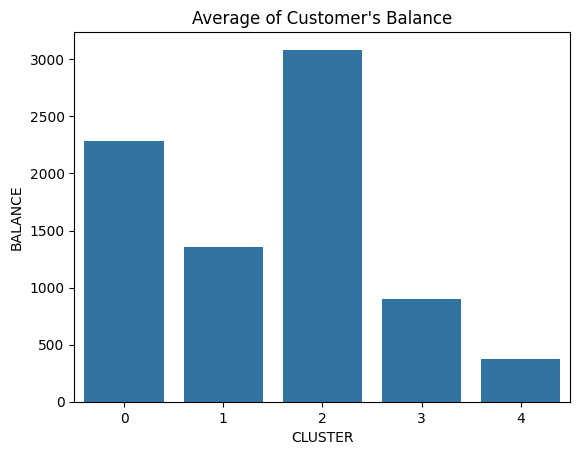

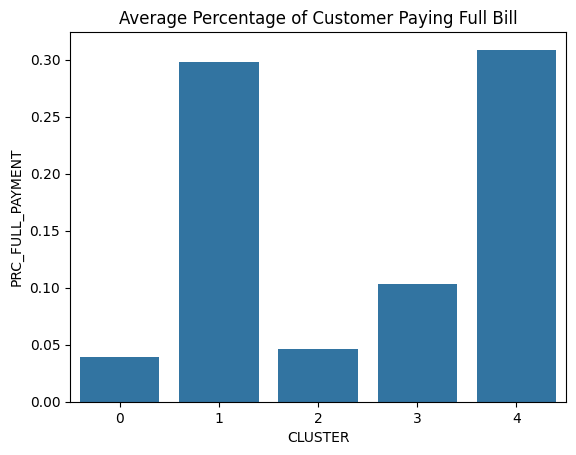

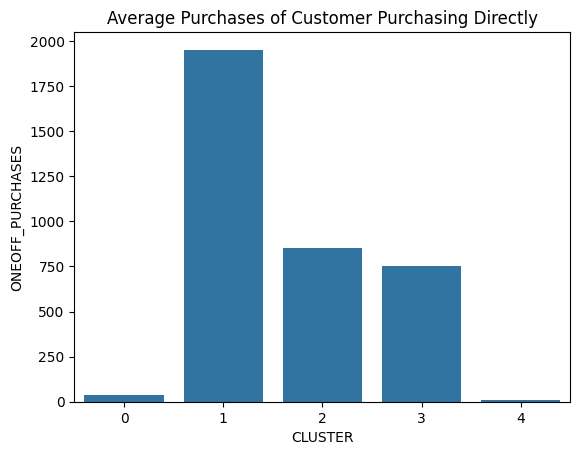

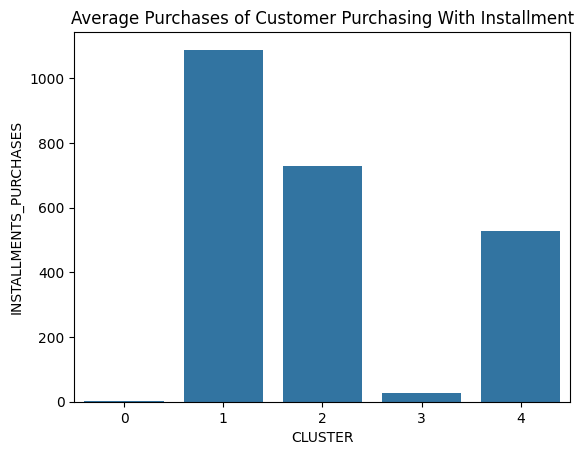

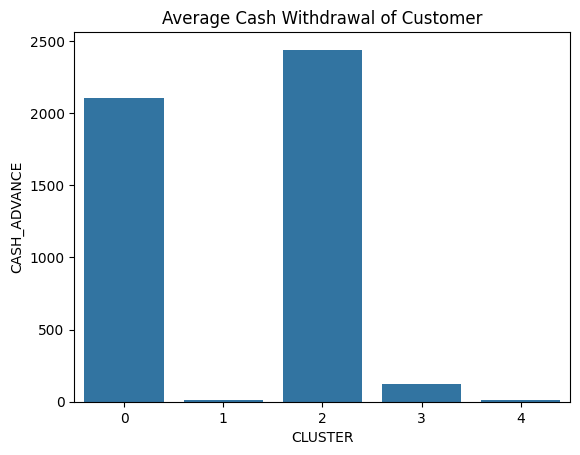

In [179]:
# Visualize BALANCE
sns.barplot(x=profil_cluster.index, y=profil_cluster['BALANCE'])
plt.title("Average of Customer's Balance")
plt.show()

# Visualize PRC_FULL_PAYMENT
sns.barplot(x=profil_cluster.index, y=profil_cluster['PRC_FULL_PAYMENT'])
plt.title('Average Percentage of Customer Paying Full Bill')
plt.show()

# Visualize ONEOFF_PURCHASES
sns.barplot(x=profil_cluster.index, y=profil_cluster['ONEOFF_PURCHASES'])
plt.title('Average Purchases of Customer Purchasing Directly')
plt.show()

# Visualize INSTALLMENTS_PURCHASES
sns.barplot(x=profil_cluster.index, y=profil_cluster['INSTALLMENTS_PURCHASES'])
plt.title('Average Purchases of Customer Purchasing With Installment')
plt.show()

# Visualize CASH_ADVANCE
sns.barplot(x=profil_cluster.index, y=profil_cluster['CASH_ADVANCE'])
plt.title('Average Cash Withdrawal of Customer')
plt.show()

In [180]:
# Make new columns for total expense
profil_cluster['TOTAL_EXPENSE'] = profil_cluster['ONEOFF_PURCHASES'] + profil_cluster['INSTALLMENTS_PURCHASES'] + profil_cluster['CASH_ADVANCE']

# Make new columns for displaying proportion of spend behavior
profil_cluster['% of ONEOFF_PURCHASES'] = (profil_cluster['ONEOFF_PURCHASES'] / profil_cluster['TOTAL_EXPENSE']) * 100
profil_cluster['% of INSTALLMENTS_PURCHASES'] = (profil_cluster['INSTALLMENTS_PURCHASES'] / profil_cluster['TOTAL_EXPENSE']) * 100
profil_cluster['% of CASH_ADVANCE'] = (profil_cluster['CASH_ADVANCE'] / profil_cluster['TOTAL_EXPENSE']) * 100

# Define columns to display by table
result_cols = [
    'BALANCE', 'PRC_FULL_PAYMENT', 'TOTAL_EXPENSE', 
    '% of ONEOFF_PURCHASES', '% of INSTALLMENTS_PURCHASES', '% of CASH_ADVANCE']

profil_analysis = profil_cluster[result_cols]
profil_analysis

BALANCE  PRC_FULL_PAYMENT  TOTAL_EXPENSE  % of ONEOFF_PURCHASES  \
CLUSTER                                                                        
0        2286.650461          0.039486    2143.669243               1.658586   
1        1353.045416          0.298371    3054.015075              63.886117   
2        3083.981362          0.046145    4022.829052              21.246146   
3         899.457707          0.102836     898.894895              83.542499   
4         374.549559          0.308731     547.641440               1.525078   

         % of INSTALLMENTS_PURCHASES  % of CASH_ADVANCE  
CLUSTER                                                  
0                           0.149484          98.191930  
1                          35.645018           0.468865  
2                          18.105205          60.648649  
3                           3.124798          13.332703  
4                          96.589562           1.885360

From the information above, we can take insights that:
1. Cluster 0 (Segment A) : High balance (debt), weak ability to pay bills with almost all in the form of cash withdrawals
2. Cluster 1 (Segment B) : Moderate balance, strong ability to pay bills with the largest nominal amount in the form of direct purchases
3. Cluster 2 (Segment C) : High balance, weak ability to pay bills with the largest nominal amount in the form of cash withdrawals
4. Cluster 3 (Segment D) : Low balance, moderate ability to pay bills wwith the largest nominal amount in the form of direct purchases
5. Cluster 4 (Segment E) : Low balance, strong ability to pay bills with the largest nominal amount in the form of installment purchases

# IX. Model Saving

In [181]:
# Saving Model
with open('deployment/kmeans_model.pkl', 'wb') as a:
    dill.dump(km_train, a)

# XI. Conclusion

From this research, we obtain 5 different customer segment with different behavior. General conclusion from this project is we should increase customer's average percentage of full payment since all segments are still ranging from 3-30%. To maximaze customer experience and raise our revenue, this research suggest recommendations for each segment namely:
1. Segment A : We should maintain intese relation with this customer because they generate big money for us. However, we should remind them actively for maintaining their balance still on their ability to pay the bills fully. We should encourage them to pay the bills fully on time so that we can lower our risk.
2. Segment B : We should encourage them to spend for installment puchases and cash withdrawals by offering special programs. With these approaches, hopefully they get used to spend for installments purchases and cash.
3. Segment C : We should consider their ability for pay bills intensively and encourage them to higher their spend for installment purchases so that they would stay with us longer.
4. Segment D : This is the worst customer, they don't generate much money for us and higher risk to pay bills. We should encourage them to spend in other ways (installment purchases and cash withdrawal) more intensively by giving promotions
5. Segment E : Eventhough their balances are lowest, but they are the stronger ability to pay and highest spending on installment purchases. For this segment we should persuade them to spend more and introduce them with cash withdrawal option.

Looking to our new data, this customer is segmented as Segment B so that we should encourage them to spend for installment puchases and cash withdrawals by offering special programs

For futher advancements, we suggest to:
1. Create new features are more relevant and show differences of each segment, for instaces total_expense, ratio of payments and full payments, spend behavior proportion (ONEOFF, INSTALLMENT and CASH_ADVANCE)
2. Try to implement other algorithms and compare which can describe and separate each segment clearly.
